**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.linear_model

In [10]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [21]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5, coef= True, random_state = 2)

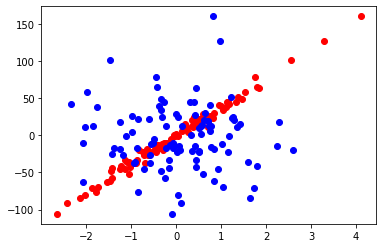

In [22]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [28]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)
print(train_data, '\n')
print(test_data, '\n')
print(train_labels, '\n')
print(test_labels, '\n')

[[ 0.69511961 -2.03346655]
 [ 0.20420798  1.40669624]
 [-1.25542722  0.93816367]
 [ 1.10914328 -1.76491773]
 [ 0.04153939 -1.11792545]
 [ 1.03302907 -0.32900243]
 [-0.1144213  -0.49817419]
 [ 0.21611601 -1.85861239]
 [-1.09873895  1.58448706]
 [ 0.52429643  0.73527958]
 [-0.18325657  1.01985473]
 [ 3.2797454   0.97086132]
 [-0.45422785  0.51437072]
 [-0.32358007  0.42382471]
 [-0.63765501 -1.18761229]
 [-0.82913529  0.08771022]
 [ 0.43349633  1.27837923]
 [ 0.18040981  0.55316427]
 [ 0.35913333  0.62222041]
 [ 0.36505352  0.77408203]
 [-0.74787095  0.00902525]
 [-0.22824756 -2.06961226]
 [-1.54667461 -2.08265194]
 [-0.26905696  2.23136679]
 [-1.22142917  1.80447664]
 [-0.38151648  0.06648901]
 [ 0.79918     1.26261366]
 [ 0.50288142 -1.24528809]
 [-0.46834626 -1.25472031]
 [ 1.36723542  1.21788563]
 [-0.63467931  0.50839624]
 [-1.02141473  0.4323957 ]
 [ 0.50185721 -0.8442137 ]
 [ 1.79259285 -0.42901332]
 [-1.13431848 -0.70742089]
 [ 1.1735315  -2.34360319]
 [ 1.74181219 -0.44750088]
 

#### LinearRegression

In [29]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [30]:
print(test_labels)

[-16.65927231  41.1068411  -44.51417742  24.47584129 -70.11132234
 -32.71074998 -71.3715844  -57.46293828   1.72644759 -76.75213382
  12.67156468 -21.47606913 -16.30914909  22.13032804   4.45578287
  45.05465366 -32.92158843  19.66406455 101.14760598  28.15553021
 -10.29545833  64.19559505 -84.32102748  44.66274342  17.64282734
 -24.77820218 -48.28700118  25.24428409  58.26281761  10.33267887]


In [31]:
print(predictions)

[-15.34445591  36.47026676 -55.32011279  22.62298189 -66.65524796
 -43.9036147  -71.18006813 -55.29301374  -0.45267069 -70.024692
  13.60950626 -18.26609047 -12.3033649   19.42965576   8.35573708
  41.80121073 -34.53090737  26.30120779  95.84837135  22.21754415
 -11.72657804  69.73934598 -81.50376002  50.51607452  21.81546067
 -27.70700023 -56.67286069  14.15935285  56.51240289   8.75994696]


In [32]:
metrics.mean_absolute_error(test_labels, predictions)

4.251980673889998

In [33]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779696, std: 1.07371044928902


In [36]:
#можно самостоятельно создавать свои метрики
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [37]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [38]:
coef

array([38.07925837,  0.        ])

In [39]:
linear_regressor.coef_

array([38.28170293,  0.66171474])

In [40]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.811927070141676

In [41]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [45]:
print("y = {:.2f}*x1 + {:.2f}*x2 {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.28*x1 + 0.66*x2 -0.81


#### Lasso

In [46]:
#регуляризатор первой степени
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [47]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [53]:
print(lasso_regressor.coef_)

[37.48138151  0.        ]


In [54]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [55]:
print("y = {:.2f}*x1 + {:.2f}*x2 {:.2f}".format(lasso_regressor.coef_[0], 
                                                  lasso_regressor.coef_[1], 
                                                  lasso_regressor.intercept_))

y = 37.48*x1 + 0.00*x2 -0.78
